In [8]:
import pandas as pd
import numpy as np
from DbConn import *
plt.style.use('fivethirtyeight')

In [9]:
db= DbConn()

In [10]:
sql='''
select 
CASE WHEN audiacc > 10000000 THEN 1 
when audiacc > 2600000 then 2
when audiacc > 680000 then 3
when audiacc > 130000 then 4
when audiacc > 30000 then 5
ELSE 6 END AUDIACC_GRADE, origin.*
from (
    SELECT b.*, m.MOVIENM , m.SHOWTM , m.NATIONS , m.GENRENM , m.DIRECTORS , m.AUDITS , m.COMPANYCD1
    FROM MOVIEDETAIL m JOIN (
    SELECT MOVIECD , MAX(AUDIACC) as audiacc
    FROM BOXOFFICE b2 GROUP BY MOVIECD 
    ) b ON m.MOVIECD = b.MOVIECD
) origin
'''

In [11]:
query_cor = pd.read_sql(sql,db.connection)

In [12]:
db.disconnect()

In [13]:
query_cor.keys()

Index(['AUDIACC_GRADE', 'MOVIECD', 'AUDIACC', 'MOVIENM', 'SHOWTM', 'NATIONS',
       'GENRENM', 'DIRECTORS', 'AUDITS', 'COMPANYCD1'],
      dtype='object')

In [14]:
cor1=query_cor[['NATIONS','AUDIACC_GRADE']]

In [15]:
cor1.head()

,NATIONS,AUDIACC_GRADE
0,미국,5
1,캐나다,5
2,한국,3
3,한국,4
4,프랑스,6


In [16]:
#산점도 작성
import matplotlib.pyplot as plt

%matplotlib inline


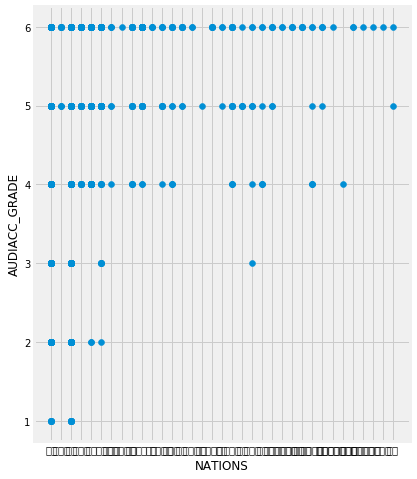

In [17]:
plt.figure(figsize=(6,8)) #플롯 사이즈 지정
plt.scatter(cor1.NATIONS,cor1.AUDIACC_GRADE)#산점도
plt.xlabel('NATIONS')#x축 레이블 지정
plt.ylabel('AUDIACC_GRADE')#y축 레이블 지정
plt.grid#플롯에 격자 보이도록
plt.show()#플롯보이기

In [18]:
import seaborn as sns

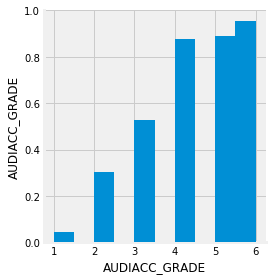

In [19]:
sns.pairplot(cor1,kind='reg',height=4)# 페어플롯 작성

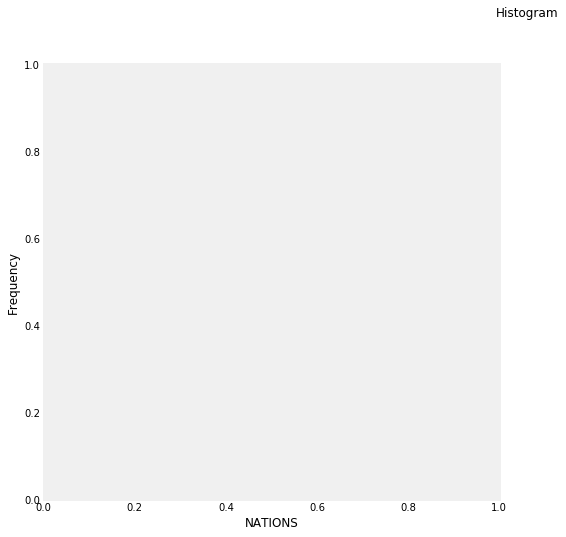

In [20]:
#히스토그램
plt.figure(figsize=(16, 8))       # 플롯 사이즈 지정
plt.suptitle("Histogram")         # 플롯 전체 제목 지정
plt.hist(cor1.NATIONS, bins=9)  
plt.subplot(1,2,1)                # 1번 플롯
  
plt.xlabel("NATIONS")
plt.ylabel("Frequency")
plt.grid()                        # 플롯에 격자 보이기
                        # 플롯에 격자 보이기

plt.show() 

In [ ]:

plt.subplot(1,2,2)                # 2번 플롯
plt.hist(cor1.AUDIACC_GRADE, bins=7)      
plt.xlabel("AUDIACC_GRADE")
plt.ylabel("Frequency")
plt.grid()